In [1]:
using DataFrames
using Arrow
using Statistics
using Clustering
using Distances
using Plots
using Chain
using FreqTables
using StatsBase

In [2]:
ENV["COLUMNS"] = 1200
ENV["LINES"] = 20
sales = DataFrame(Arrow.Table("./data/sales_norm.arrow"))

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102,P103,P104,P105,P106
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.369588,1.27724,-0.579404,1.04645,-0.142511,-0.498219,-0.0405672,-0.237123,0.983832,0.483169,0.965096,-0.470112,0.783898,0.493861,-1.96494,-0.848928,1.84777,1.07741,-0.954593,1.39934,1.03811,-0.34603,-0.636501,-0.0120404,-0.750642,0.983263,1.1921,0.263678,0.226148,1.73689,-0.451463,1.78403,0.953724,1.26766,-0.10993,0.670228,0.0362178,0.0641288,-0.342746,0.652605,0.00466017,1.26108,-1.00828,0.212307,1.07535,-0.742753,0.817533,-0.703073,0.370776,1.08344,0.229837,0.948847,-1.06505,0.714517,0.343167,-0.244034,0.598411,-0.212711,-1.40419,0.504808,-1.03487,-0.829129,0.240485,0.321335,1.33058,-0.0510801,0.512905,1.51857,-1.02136,-0.14412,-1.00276,-1.0893,0.273169,-0.303024,-0.176408,-0.659253,1.15005,0.914915,0.632646,0.911137,1.38497,0.467281,1.43092,-0.607456,0.963944,0.691473,-0.250993,1.57763,-1.06982,1.38263,0.429042,-1.14913,0.702848,2.05291,-0.0833461,-0.500986,-0.365434,-0.0204771,2.09249,0.397337,-1.12565,0.364633,-0.411871,0.0194259,-0.897847,0.087946
2,0.640272,0.854207,0.790096,-0.075517,-1.06883,-0.498219,1.64703,-0.962441,-0.369588,-0.0793262,-1.27781,0.050012,0.254512,0.039334,1.28671,-1.26935,0.743354,0.795874,-0.213715,2.77878,-1.29444,1.17455,0.485467,0.739282,-0.438375,0.983263,-0.0886683,-0.11719,-0.508832,0.450306,2.55829,1.17967,0.108378,0.623928,0.353557,-0.415124,0.439787,-0.0400805,-1.58044,-1.12014,-0.964655,-0.652622,0.712634,-0.804531,-0.358452,1.6093,1.06614,2.01421,-0.995548,-1.98959,-0.837264,1.48956,0.213011,0.851116,-0.223331,-0.671778,-0.883368,0.0862342,1.43146,1.0072,-0.309623,2.25049,0.488113,0.742581,0.172586,0.673328,-0.37613,0.690259,1.27022,0.926484,0.601654,-0.106331,-0.355361,-0.00571743,1.32964,0.200848,1.15005,1.04455,0.224825,-0.216937,-0.78917,1.10672,0.661183,-0.99583,0.304403,0.0377167,1.00699,-0.530034,-0.809255,0.171738,0.783171,-0.0506968,0.0885943,0.0833283,0.729278,0.0445904,0.752363,-1.08529,0.533614,-1.0937,1.8187,1.42644,-1.07087,0.0194259,-0.384792,-0.216934
3,0.0989037,-0.414901,-0.237029,1.32694,1.40135,-0.903022,-0.462466,0.488195,-0.0989037,-0.0793262,0.965096,-1.51036,-0.0101805,-0.642456,1.53684,-1.26935,0.743354,0.936641,1.86074,0.709618,0.0384487,-0.34603,-0.075517,-1.13902,0.342293,-0.34134,-0.216745,0.644546,-0.0188456,1.60823,-0.752438,0.273124,-0.173404,-1.69352,-1.34589,0.429039,0.977879,0.689385,-0.714054,-1.12014,-1.08582,1.00592,0.368452,-0.659269,0.945009,-0.247584,-0.798409,0.655568,1.12985,2.10779,-0.197003,0.543312,0.639033,0.168122,1.47616,1.18178,0.474929,0.684124,0.36809,1.63519,-0.0195258,0.40272,2.34532,-0.380741,-0.116913,1.15627,0.80925,0.138052,1.67462,2.39856,0.200551,0.508027,0.398875,-0.897637,0.234333,1.30669,0.69003,-0.122155,1.72017,0.159087,1.1132,2.70531,-0.108552,-0.348541,-0.487045,0.03771

In [3]:
sales_mat = Matrix(sales)
println("Extrema of the column means: ", extrema(mean(sales_mat, dims=1)))
println("Extrema of the column standard deviations: ", extrema(std(sales_mat, dims=1)))

Extrema of the column means: (-4.526293869625638e-16, 5.252208924188241e-16)
Extrema of the column standard deviations: (0.9999999999999998, 1.0000000000000002)


In [4]:
kmpp_results = [kmeans(sales_mat, i; init=:kmpp) for i in 2:20];
rand_results = [kmeans(sales_mat, i; init=:rand) for i in 2:20];

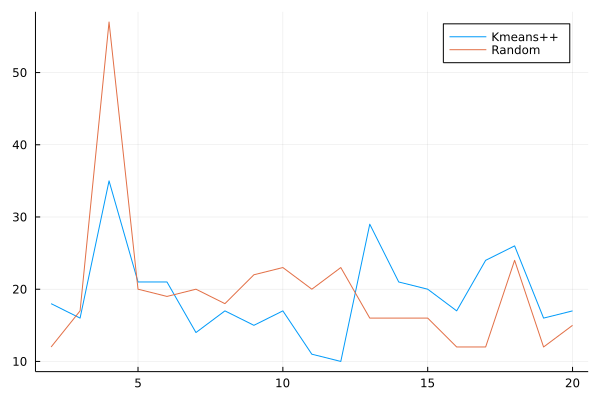

In [5]:
ax = plot([(nclusters(r), r.iterations) for r in kmpp_results], label="Kmeans++")
plot!(ax, [(nclusters(r), r.iterations) for r in rand_results], label="Random")

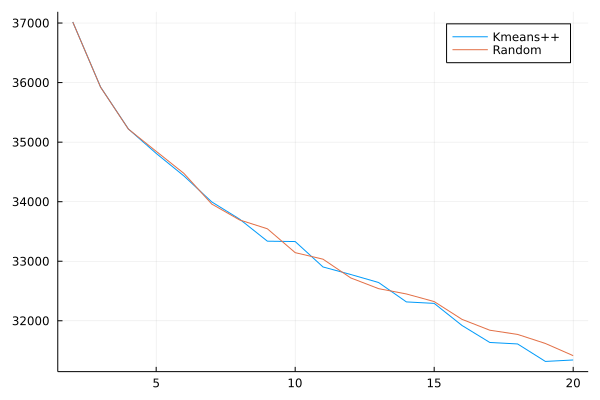

In [6]:
ax = plot([(nclusters(r), r.totalcost) for r in kmpp_results], label="Kmeans++")
plot!(ax, [(nclusters(r), r.totalcost) for r in rand_results], label="Random")

In [7]:
first(sales, 5)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102,P103,P104,P105,P106,P107,P108,P109
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.369588,1.27724,-0.579404,1.04645,-0.142511,-0.498219,-0.0405672,-0.237123,0.983832,0.483169,0.965096,-0.470112,0.783898,0.493861,-1.96494,-0.848928,1.84777,1.07741,-0.954593,1.39934,1.03811,-0.34603,-0.636501,-0.0120404,-0.750642,0.983263,1.1921,0.263678,0.226148,1.73689,-0.451463,1.78403,0.953724,1.26766,-0.10993,0.670228,0.0362178,0.0641288,-0.342746,0.652605,0.00466017,1.26108,-1.00828,0.212307,1.07535,-0.742753,0.817533,-0.703073,0.370776,1.08344,0.229837,0.948847,-1.06505,0.714517,0.343167,-0.244034,0.598411,-0.212711,-1.40419,0.504808,-1.03487,-0.829129,0.240485,0.321335,1.33058,-0.0510801,0.512905,1.51857,-1.02136,-0.14412,-1.00276,-1.0893,0.273169,-0.303024,-0.176408,-0.659253,1.15005,0.914915,0.632646,0.911137,1.38497,0.467281,1.43092,-0.607456,0.963944,0.691473,-0.250993,1.57763,-1.06982,1.38263,0.429042,-1.14913,0.702848,2.05291,-0.0833461,-0.500986,-0.365434,-0.0204771,2.09249,0.397337,-1.12565,0.364633,-0.411871,0.0194259,-0.897847,0.087946,0.337189,-1.44168,-0.126168
2,0.640272,0.854207,0.790096,-0.075517,-1.06883,-0.498219,1.64703,-0.962441,-0.369588,-0.0793262,-1.27781,0.050012,0.254512,0.039334,1.28671,-1.26935,0.743354,0.795874,-0.213715,2.77878,-1.29444,1.17455,0.485467,0.739282,-0.438375,0.983263,-0.0886683,-0.11719,-0.508832,0.450306,2.55829,1.17967,0.108378,0.623928,0.353557,-0.415124,0.439787,-0.0400805,-1.58044,-1.12014,-0.964655,-0.652622,0.712634,-0.804531,-0.358452,1.6093,1.06614,2.01421,-0.995548,-1.98959,-0.837264,1.48956,0.213011,0.851116,-0.223331,-0.671778,-0.883368,0.0862342,1.43146,1.0072,-0.309623,2.25049,0.488113,0.742581,0.172586,0.673328,-0.37613,0.690259,1.27022,0.926484,0.601654,-0.106331,-0.355361,-0.00571743,1.32964,0.200848,1.15005,1.04455,0.224825,-0.216937,-0.78917,1.10672,0.661183,-0.99583,0.304403,0.0377167,1.00699,-0.530034,-0.809255,0.171738,0.783171,-0.0506968,0.0885943,0.0833283,0.729278,0.0445904,0.752363,-1.08529,0.533614,-1.0937,1.8187,1.42644,-1.07087,0.0194259,-0.384792,-0.216934,0.337189,-0.428608,-0.438585
3,0.0989037,-0.414901,-0.237029,1.32694,1.40135,-0.903022,-0.462466,0.488195,-0.0989037,-0.0793262,0.965096,-1.51036,-0.0101805,-0.642456,1.53684,-1.26935,0.743354,0.936641,1.86074,0.709618,0.0384487,-0.34603,-0.075517,-1.13902,0.342293,-0.34134,-0.216745,0.644546,-0.0188456,1.60823,-0.752438,0.273124,-0.173404,-1.69352,-1.34589,0.429039,0.977879,0.689385,-0.714054,-1.12014,-1.08582,1.00592,0.368452,-0.659269,0.945009,-0.247584,-0.798409,0.655568,1.12985,2.10779,-0.197003,0.543312,0.639033,0.168122,1.47616,1.18178,0.474929,0.684124,0.36809,1.63519,-0.0195258,0.40272,2.34532,-0.380741,-0.116913,1.15627,0.80925,0.138052,1.67462,2.39856,0.200551,0.508027,0.398875,-0.897637,0.234333

In [8]:
freqtable(kmpp_results[3].assignments, rand_results[3].assignments)

4×4 Named Matrix{Int64}
Dim1 ╲ Dim2 │   1    2    3    4
────────────┼───────────────────
1           │   0    2    0  218
2           │   1    2  215    1
3           │   1  201    1    0
4           │ 166    1    2    0

In [9]:
kmpp_runs = [kmeans(sales_mat, 4; init=:kmpp) for _ in 1:1000]
rand_runs = [kmeans(sales_mat, 4; init=:rand) for _ in 1:1000];

In [10]:
(variation([r.totalcost for r in kmpp_runs]), variation([r.totalcost for r in rand_runs]))
# Very small CoV => results are stable

(0.0022116801296389555, 0.0022110184568953518)

In [14]:
kmpp_best = kmpp_runs[argmin([r.totalcost for r in kmpp_runs])]
rand_best = rand_runs[argmin([r.totalcost for r in rand_runs])]

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.022706329478476922 0.14743943362073117 -0.1848426254464263 -0.3597191197233228; -0.11665277204736205 0.25154521089584964 -0.09445392256722515 -0.31478484956453534; … ; 0.6074683962285986 -0.443937479864605 0.4007097673513414 0.6172669291323614; 0.9829887732746506 -0.8131122445699382 -0.10015828356175469 2.5525547846403525], [2, 3, 3, 3, 2, 1, 2, 1, 1, 2  …  3, 4, 4, 1, 4, 3, 4, 4, 3, 3], [47.37598914021349, 55.36715583022114, 51.1458609846312, 50.331571251053795, 44.85941073434883, 46.32887354460138, 44.44357002163868, 53.63304653822835, 40.26898582200895, 41.87963005088119  …  55.30984102437201, 47.65863268573111, 48.14115517191707, 40.681278688796894, 41.35618538370051, 53.83850126467973, 40.31286877385476, 39.30243639053165, 47.097306677641264, 51.376163137985294], [201, 229, 221, 160], [201, 229, 221, 160], 35206.67141013854, 26, true)

In [17]:
[kmpp_best.counts rand_best.counts]
# => The clusters seem fairly evenly distributed

4×2 Matrix{Int64}:
 207  201
 163  229
 225  221
 216  160

In [59]:
tmp = copy(sales)
tmp.week = string.(collect(1:nrow(sales)))
sales_t = permutedims(tmp, :week, :product_code)
sales_t.kmpp_assignment = kmpp_best.assignments
wcols = names(sales_t, r"\d+")
@chain sales_t begin
    groupby(:kmpp_assignment)
    combine(wcols .=> mean, renamecols=false)
    select(:kmpp_assignment => ByRow(string), Not(:kmpp_assignment), renamecols=false)
    permutedims(:kmpp_assignment, :week)
    select(r"\d+")
end

,1,2,3,4
,Float64,Float64,Float64,Float64
1,-0.0477652,-0.346463,-0.164457,0.158139
2,-0.0763587,-0.317181,-0.0912558,0.235908
3,-0.161369,-0.175201,-0.124047,0.370613
4,0.0020607,-0.220183,-0.178397,0.526572
5,-0.0497425,-0.132563,-0.08493,0.479701
6,0.14861,-0.183421,-0.1811,0.333766
7,0.0471027,-0.242673,-0.0420492,0.542228
8,-0.00464801,-0.210694,-0.0873255,0.513427
9,0.0906214,-0.219865,-0.260661,0.571971
